# Quick Demo: EDA & Resampling to answer basic comparison questions

This is as a quick illustration of how we can combine our previous lessons about **resampling** and our skills with Tidy Data to get an answer to a *specific question*.

This example should serve as a guide for how you might approach some of the questions you'll be asked to do in HW 2.

We'll use the `starwars.csv` file that you'll explore in `03_challenge.ipynb` to answer the following question:

### For non-human species on average, who is taller: males or females?

In [5]:
import polars as pl
from polars import col
import seaborn as sns

Let's load the file and print the first few rows:

In [3]:
# Solution
sw = pl.read_csv('starwars.csv')
sw.head()

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
str,f64,f64,str,str,str,f64,str,str,str,str
"""Luke Skywalker""",172.0,77.0,"""blond""","""fair""","""blue""",19.0,"""male""","""masculine""","""Tatooine""","""Human"""
"""C-3PO""",167.0,75.0,null,"""gold""","""yellow""",112.0,"""none""","""masculine""","""Tatooine""","""Droid"""
"""R2-D2""",96.0,32.0,null,"""white, blue""","""red""",33.0,"""none""","""masculine""","""Naboo""","""Droid"""
"""Darth Vader""",202.0,136.0,"""none""","""white""","""yellow""",41.9,"""male""","""masculine""","""Tatooine""","""Human"""
"""Leia Organa""",150.0,49.0,"""brown""","""light""","""brown""",19.0,"""female""","""feminine""","""Alderaan""","""Human"""


Then let's filter the data down to non-human males and females only:

In [6]:
filtered = sw.filter(
    (~col('species').eq('Human')) & (col('sex').is_in(['female','male'])) 
    )

filtered

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
str,f64,f64,str,str,str,f64,str,str,str,str
"""Chewbacca""",228.0,112.0,"""brown""","""unknown""","""blue""",200.0,"""male""","""masculine""","""Kashyyyk""","""Wookiee"""
"""Greedo""",173.0,74.0,null,"""green""","""black""",44.0,"""male""","""masculine""","""Rodia""","""Rodian"""
"""Yoda""",66.0,17.0,"""white""","""green""","""brown""",896.0,"""male""","""masculine""",null,"""Yoda's species"""
"""Bossk""",190.0,113.0,"""none""","""green""","""red""",53.0,"""male""","""masculine""","""Trandosha""","""Trandoshan"""
"""Ackbar""",180.0,83.0,"""none""","""brown mottle""","""orange""",41.0,"""male""","""masculine""","""Mon Cala""","""Mon Calamari"""
…,…,…,…,…,…,…,…,…,…,…
"""San Hill""",191.0,null,"""none""","""grey""","""gold""",null,"""male""","""masculine""","""Muunilinst""","""Muun"""
"""Shaak Ti""",178.0,57.0,"""none""","""red, blue, white""","""black""",null,"""female""","""feminine""","""Shili""","""Togruta"""
"""Grievous""",216.0,159.0,"""none""","""brown, white""","""green, yellow""",null,"""male""","""masculine""","""Kalee""","""Kaleesh"""


Now let's **summarize** the data by calculating the *mean* and *median* of the height column separately for males and females.

We an use a `.group_by` to do this

In [8]:
filtered.group_by('sex').agg(
    height_mean = col('height').mean(),
    height_median = col('height').median(),
)

sex,height_mean,height_median
str,f64,f64
"""female""",179.571429,178.0
"""male""",176.911765,189.0


That's interesting - it looks like male non-humans have a lower *mean* height than females, but not a lower *median* height.

But these summary statistics don't tell us about the *distrubution* of heights by sex. So let's visualize those using `sns.catplot`

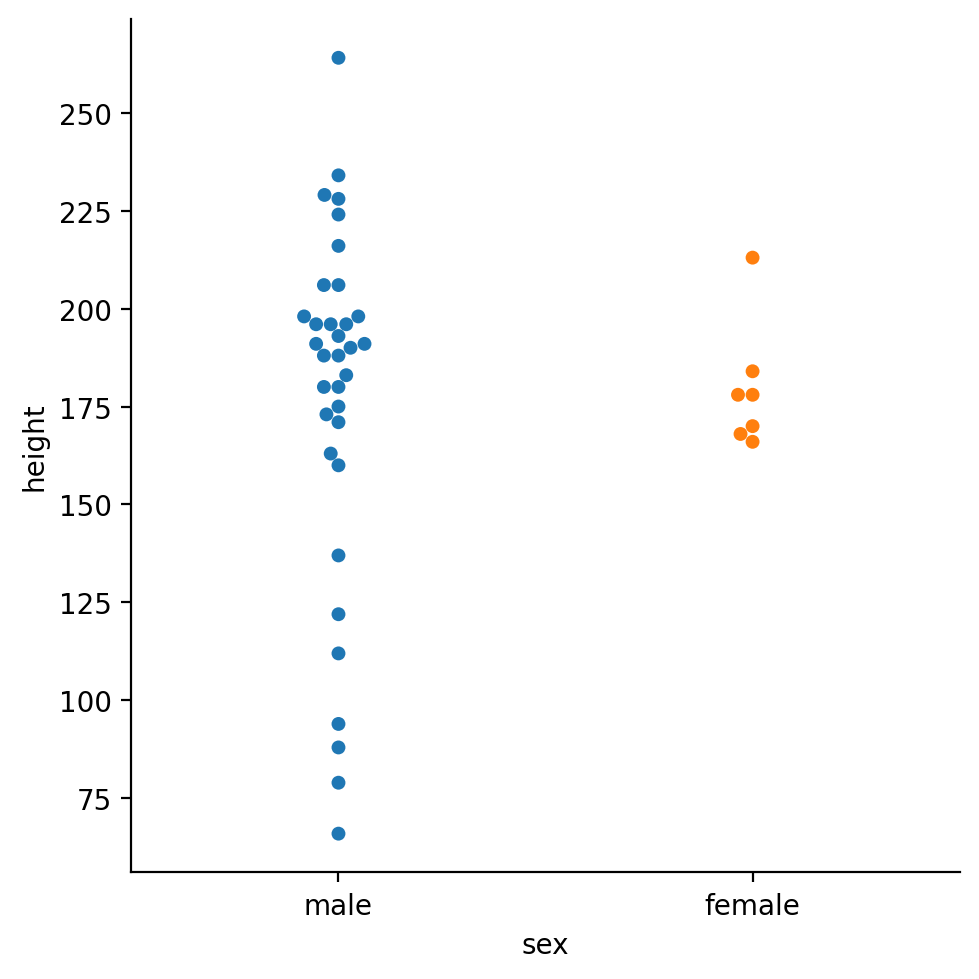

In [11]:
sns.catplot(
    data=filtered,
    kind='swarm',
    x='sex',
    y='height',
    hue='sex',
)

Interesting the male character look like their heights are more *spread out*. We also have many more observations of male heights than female heights.

Let's make a nice summary figure that combines the distributions of heights with summary statistics. 

We'll use *layers* to combine:

- A stripplot with `color = 'black', alpha = 0.3`  
- A boxplot with `color = 'skyblue'`  
- A pointplot with `color = 'black'`

*Hint: Look at the "layering plots" section of the tutorial notebook and use `grid.map()`*


Text(0.5, 1.02, 'Non-human height by Sex')

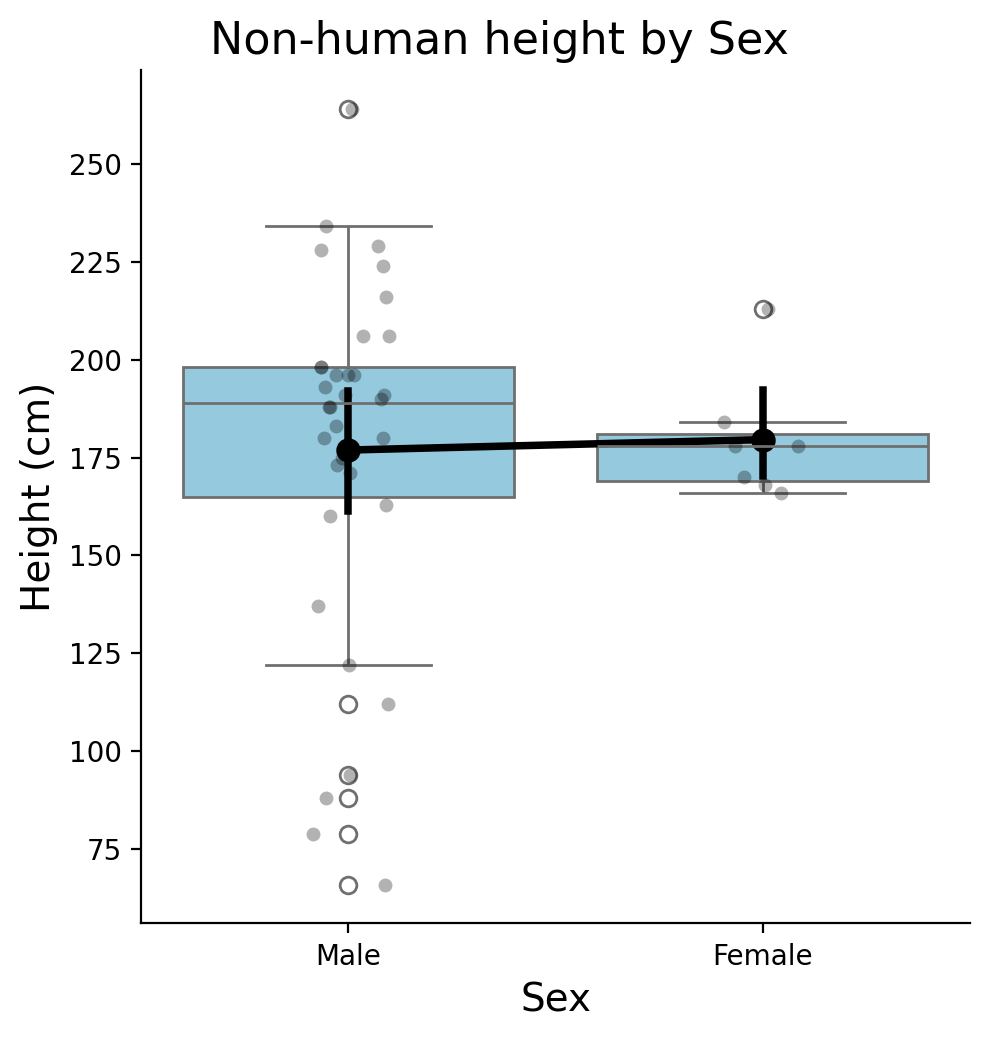

In [19]:
# Setup grid with data
grid = sns.FacetGrid(
    data= filtered,
    height=5,
    aspect=1
)

# Strip - each individual character 
grid.map(sns.stripplot,'sex','height', order=['male','female'], color='black', alpha=0.3)

# Box - medians
grid.map(sns.boxplot,'sex','height', order=['male','female'], color='skyblue')

# Points - averages
grid.map(sns.pointplot,'sex','height', order=['male','female'], color='black')

# Labels
grid.set_axis_labels('Sex', 'Height (cm)', fontsize=14)
grid.set_xticklabels(['Male', 'Female'])
grid.figure.suptitle('Non-human height by Sex', fontsize=16, y=1.02)

Now let's try to use resampling to compare these groups.  
One way we can do this is by asking: *how likely are we to observe this average difference if characters were randomly assigned to one of the two sexes*?

We can simulate this by **resampling without replacement**, i.e. **permuting** the sex label across characters, re-calculating the mean difference, and then repeating this process many times.

We can use the [`permutation_test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html) function, which needs us to give it:

- a *tuple* of the two groups we want to compare
- a function that takes each group and returns the statistic we want to make an inference about



In [20]:
from scipy.stats import permutation_test

First lets get all the *male* and *female* heights, and store them in two new variables that we'll give to `permutation_test`

We can do this by *filtering* rows by sex and *selecting* the height column, and converting the result to a numpy array:

In [21]:
males = filtered.filter(col('sex') == 'male').select('height').to_numpy()
males.shape

(34, 1)

Since the array is 2 dimensional (it was originally a column), we can use `.squeeze()` to remove the extra dimension we don't need:

In [22]:
males = males.squeeze()
males.shape

(34,)

And repeat for females

In [23]:
females = filtered.filter(col('sex') == 'female').select('height').to_numpy().squeeze()
females.shape

(7,)

Then we'll create a function that takes the mean difference between both groups:

In [26]:
import numpy as np

def mean_diff(x, y):
    return np.mean(x) - np.mean(y)

Now we have all the pieces that `permutation_test` needs so lets use it.  

In [29]:
result = permutation_test(
    (males, females),             # <- this is a tuple! 
    statistic=mean_diff, 
    permutation_type='independent',
    n_resamples=1000
    )

Let's create a simple `matplotlib` histogram to check out the result and plot the true mean difference

(array([  1.,   8.,  76., 180., 227., 243., 151.,  72.,  37.,   5.]),
 array([-59.33613445, -47.58739496, -35.83865546, -24.08991597,
        -12.34117647,  -0.59243697,  11.15630252,  22.90504202,
         34.65378151,  46.40252101,  58.1512605 ]),
 <BarContainer object of 10 artists>)

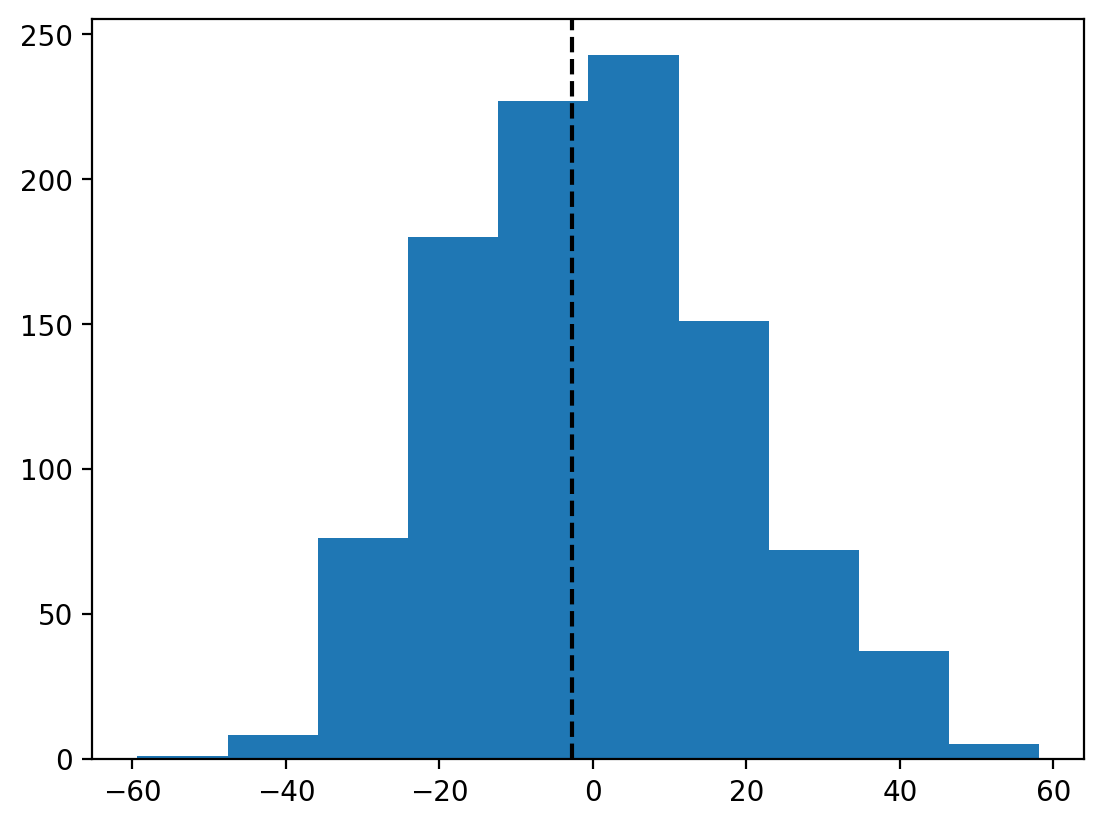

In [30]:
plt.hist(result.null_distribution);
plt.axvline(result.statistic, color='black', linestyle='--')

We can see that our observed mean difference (black line) is centered inside the **null distribution** we created by shuffling sex labels around. 

The `result.pvalue` captures the proportion of times we'd observe a mean difference as large as ours if the null distribution were true, i.e. if sex labels were randomly assigned.

This suggests that we'd be pretty likely to observe this mean difference *even if* sex labels were shuffled - so we shouldn't make much of it.

In [31]:
result.pvalue

0.9010989010989011

This quick example is meant to give you a sense of how to test a specific comparison, simply using some of the resampling approaches we learned about before.

Remember we also learned about the [`bootstrap`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html) function from `scipy.stats` that resamples **with replacement** to help us estimate our *uncertainty* about a statistical estimate and capture this in **confidence intervals**.

Keep these in mind, along with the `.sample()` method that Polars DataFrames have to help you with future data analysis tasks!
